In [333]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [334]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [335]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
y = df['koi_disposition'].values.reshape(-1, 1)
data = df.drop(['koi_disposition'] ,axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=42)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8017,0,1,1,0,0.806277,4.947000e-06,-4.947000e-06,131.785670,0.006720,-0.006720,...,-184.0,4.471,0.054,-0.229,0.996,0.324,-0.108,290.81723,38.539120,13.614
1233,0,1,1,0,3.582077,4.318000e-06,-4.318000e-06,355.515064,0.000864,-0.000864,...,-235.0,4.422,0.090,-0.195,0.993,0.283,-0.131,296.07822,43.136940,15.193
2592,0,0,0,0,5.060923,2.616000e-05,-2.616000e-05,134.473160,0.004730,-0.004730,...,-112.0,4.492,0.048,-0.112,0.911,0.121,-0.060,289.91742,40.828606,13.346
4770,0,1,0,1,8.480304,3.320000e-07,-3.320000e-07,135.854534,0.000031,-0.000031,...,-169.0,3.946,0.195,-0.105,2.210,0.375,-0.563,298.80020,46.665539,7.631
6632,0,0,0,1,4.994716,4.495000e-05,-4.495000e-05,136.183300,0.009500,-0.009500,...,-194.0,3.706,0.320,-0.080,2.830,0.458,-1.068,282.58215,46.815510,13.352


In [337]:
# Pre-processing

#Scale the data using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

C:\Users\skavy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [338]:
import numpy as np
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled,np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [339]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8502592253735896
Testing Data Score: 0.838975297346752


In [340]:
model2 = SVC(kernel='linear')
model2.fit(X_test_scaled,np.ravel(y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [341]:

print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Testing Data Score: 0.8284537968892955


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [342]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [50,100, 300,500,800],
              'gamma': [1,0.1, 0.01,0.001,0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [343]:
# Train the model with GridSearch
grid.fit(X_train_scaled,np.ravel(y_train))


C:\Users\skavy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=50, gamma=1 ...................................................
[CV] .......... C=50, gamma=1, score=0.8820840950639853, total=   0.4s
[CV] C=50, gamma=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=50, gamma=1, score=0.8695652173913043, total=   0.4s
[CV] C=50, gamma=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .......... C=50, gamma=1, score=0.8956521739130435, total=   0.5s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.8820840950639853, total=   0.5s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.8695652173913043, total=   0.4s
[CV] C=50, gamma=0.1 .................................................
[CV] ........ C=50, gamma=0.1, score=0.8956521739130435, total=   0.5s
[CV] C=50, gamma=0.01 ................................................
[CV] ....... C=50, gamma=0.01, score=0.8820840950639853, total=   0.5s
[CV] C=50, gamma=0.01 ................................................
[CV] ....... C=50, gamma=0.01, score=0.8695652173913043, total=   0.4s
[CV] C=50, gamma=0.01 ................................................
[CV] ....... C=50, gamma=0.01, score=0.8956521739130435, total=   0.5s
[CV] C=50, gamma=0.001 ...............................................
[CV] .

[CV] ......... C=800, gamma=1, score=0.8948811700182815, total=   3.8s
[CV] C=800, gamma=1 ..................................................
[CV] ......... C=800, gamma=1, score=0.8759725400457666, total=   2.5s
[CV] C=800, gamma=1 ..................................................
[CV] ......... C=800, gamma=1, score=0.8965675057208238, total=   3.4s
[CV] C=800, gamma=0.1 ................................................
[CV] ....... C=800, gamma=0.1, score=0.8948811700182815, total=   3.8s
[CV] C=800, gamma=0.1 ................................................
[CV] ....... C=800, gamma=0.1, score=0.8759725400457666, total=   2.6s
[CV] C=800, gamma=0.1 ................................................
[CV] ....... C=800, gamma=0.1, score=0.8965675057208238, total=   3.9s
[CV] C=800, gamma=0.01 ...............................................
[CV] ...... C=800, gamma=0.01, score=0.8948811700182815, total=   4.0s
[CV] C=800, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [50, 100, 300, 500, 800], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [344]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 800, 'gamma': 1}
0.8891430314120159


In [347]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [2000],
              'gamma': [1, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)
grid.fit(X_train_scaled,np.ravel(y_train))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=2000, gamma=1 .................................................


C:\Users\skavy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=2000, gamma=1, score=0.8948811700182815, total=   5.1s
[CV] C=2000, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] ........ C=2000, gamma=1, score=0.8759725400457666, total=   5.0s
[CV] C=2000, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


[CV] ........ C=2000, gamma=1, score=0.8961098398169336, total=   4.4s
[CV] C=2000, gamma=0.01 ..............................................
[CV] ..... C=2000, gamma=0.01, score=0.8948811700182815, total=   5.1s
[CV] C=2000, gamma=0.01 ..............................................
[CV] ..... C=2000, gamma=0.01, score=0.8759725400457666, total=   5.1s
[CV] C=2000, gamma=0.01 ..............................................
[CV] ..... C=2000, gamma=0.01, score=0.8961098398169336, total=   4.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [2000], 'gamma': [1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [348]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 2000, 'gamma': 1}
0.8889905458981396


# RANDOM FOREST CLASSIFIER

In [376]:
#Random First Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, np.ravel(y_train))
rf.score(X_test_scaled,np.ravel(y_test))

0.8938700823421775

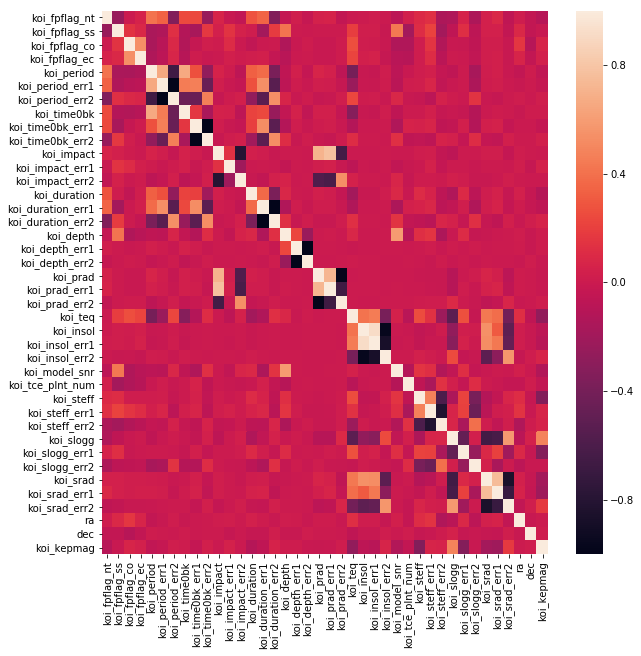

In [377]:
#Heatmap to see the correlations for the features
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)

In [380]:
data1 = data.drop(["koi_time0bk_err2"],axis=1)
data1.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,0.146,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,0.586,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,0.969,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,1.276,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,0.701,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, random_state=42)
#Random First Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, np.ravel(y_train))
rf.score(X_test_scaled,np.ravel(y_test))

0.8956999085086916

# K-Nearest Neighbour

In [382]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.799
k: 5, Train/Test Score: 0.869/0.812
k: 7, Train/Test Score: 0.862/0.812
k: 9, Train/Test Score: 0.857/0.810
k: 11, Train/Test Score: 0.851/0.805
k: 13, Train/Test Score: 0.848/0.802
k: 15, Train/Test Score: 0.847/0.809
k: 17, Train/Test Score: 0.843/0.806
k: 19, Train/Test Score: 0.840/0.808


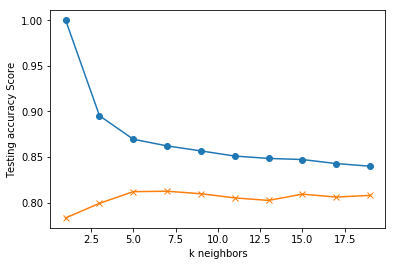

In [383]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, np.ravel(y_train))
    train_score = knn.score(X_train_scaled, np.ravel(y_train))
    test_score = knn.score(X_test_scaled, np.ravel(y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [384]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, np.ravel(y_train))
print('k=5, Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5, Test Acc: 0.812
